# Natural Language Processing (NLP)

text processing, Morph Analyzer, POS Tagging - Me, Parsing, Machine Translation, Speech Processing, Text to Speech, Automatic Speech recognition, Speech to Speech Translation.

## How to classify messages from spam and good messages

In [27]:
# TO DOWNLOAD NLTK AND HAVE CONDA

#!conda install nltk #This installs nltk 
import nltk
nltk.download() #Download necessary datasets

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [28]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


In [29]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
messages['length'].max()

910

In [57]:
messages['message'][messages['length']==messages['length'].max()]

1085    For me the love should start with attraction.i...
Name: message, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A463591A90>,
      dtype=object)

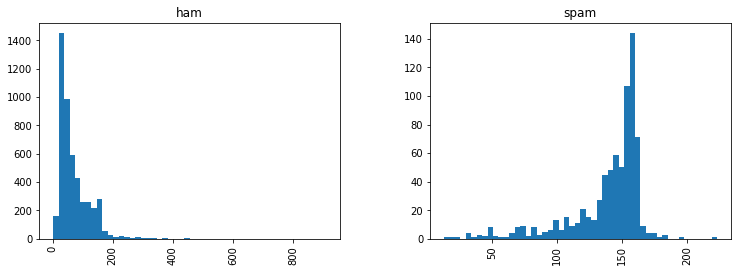

In [36]:
messages.hist(column='length',by='label',bins=50, figsize=(12,4))

In [37]:
import string

mess = 'Sample message! Notice: it has punctuation.'

#Check characters to see if they are in punction
nopunc = [char for char in mess if char not in string.punctuation]

#Join the characters again to form the string.
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [38]:
#Removing stopwords
from nltk.corpus import stopwords
stopwords.words('english')[0:10] #Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [39]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [40]:
#Now just remove any stopwords
clean_mess = [word for word in nopunc.split()
             
              if word.lower() not in stopwords.words('english')]

In [62]:
def clean_message(column):
    """
    Function that removes stopwords and punctuation from a corpus of text messages
    param corpus: The corpus from which the necessary words and punction are to be removed
    param type: dataframe column
    returns clean corpus: Data frame that has been cleaned of unnecessary words and punctuation
    """
    
    #Remove punctuation
    clean_column = [word for word in column if word not in string.punctuation ]
    clean_column = ''.join(clean_column)
    
    #Remove stopwords
    clean_column = [word for word in clean_column.split() if word.lower() not in stopwords.words('english') ]
    
    return clean_column

In [54]:
clean_corpus('A String with! and @ marks.')

['String', 'marks']

In [55]:
#Check to make sure it's working
messages['message'].head(5).apply(clean_corpus)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [56]:
#Show original dataframe
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
#Might take a while
bow_transformer = CountVectorizer(analyzer=clean_message).fit(messages['message'])

#print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [69]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [70]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [74]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [75]:
messages_bow = bow_transformer.transform(messages['message'])